# Taller 4

## 1. Carga y exploración inicial de los datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas_profiling import ProfileReport

from scipy.stats import geom
from scipy.stats import norm

df = pd.read_csv('conexion_clientes_completo.csv') # Cargar el dataset
print(df.head()) # Vista general
print(df.dtypes) # Tipos de datos
print(df.describe(include='all')) # Resumen estadístico


   cliente_id     region tipo_cliente dispositivo  intentos_conexion  \
0           1    Oriente  Empresarial          PC                  1   
1           2  Occidente  Residencial       Móvil                  3   
2           3        Sur  Residencial       Móvil                 12   
3           4  Occidente  Empresarial       Móvil                  1   
4           5  Occidente  Empresarial     SmartTV                  5   

   tiempo_conexion_ms  
0          121.442446  
1          152.324416  
2          157.732576  
3          112.747183  
4          160.025293  
cliente_id              int64
region                 object
tipo_cliente           object
dispositivo            object
intentos_conexion       int64
tiempo_conexion_ms    float64
dtype: object
         cliente_id  region tipo_cliente dispositivo  intentos_conexion  \
count   1000.000000    1000         1000        1000        1000.000000   
unique          NaN       5            2           4                NaN   
top 

## 2. Gráficos de Datos Categóricos (Técnicas Buenas Prácticas)

#### Gráficos de Barras para Variables Categóricas

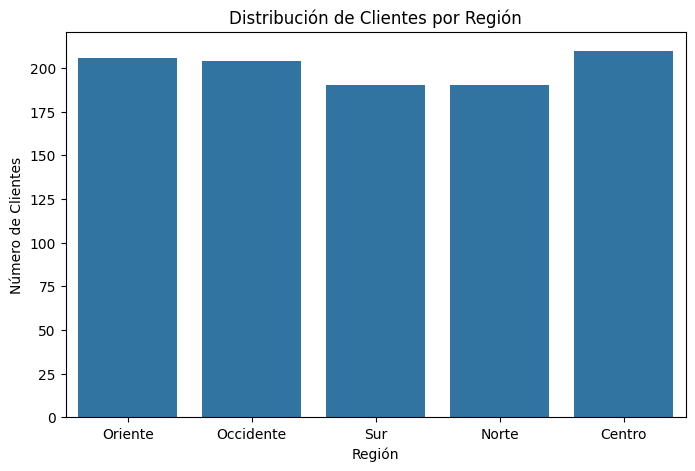

In [5]:
# Conteo de clientes por región
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='region')
plt.title('Distribución de Clientes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')
plt.show()

#### Gráficos de Barras Horizontales

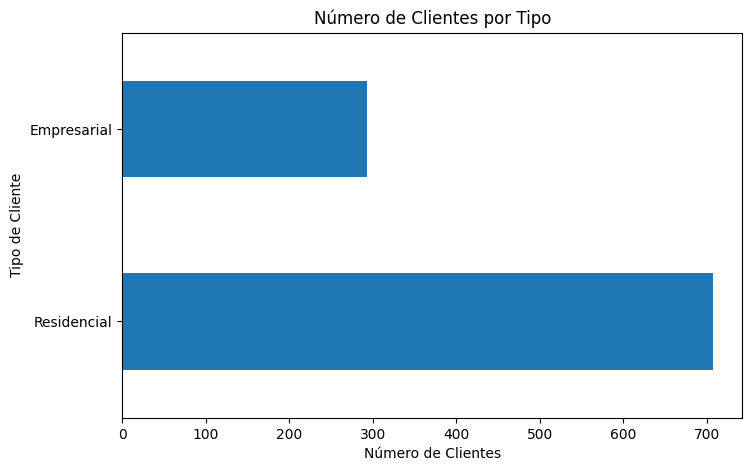

In [6]:
plt.figure(figsize=(8, 5))
df['tipo_cliente'].value_counts().plot(kind='barh')
plt.title('Número de Clientes por Tipo')
plt.xlabel('Número de Clientes')
plt.ylabel('Tipo de Cliente')
plt.show()

#### Gráfico de Conteo por Dispositivo (agrupado por tipo de cliente)

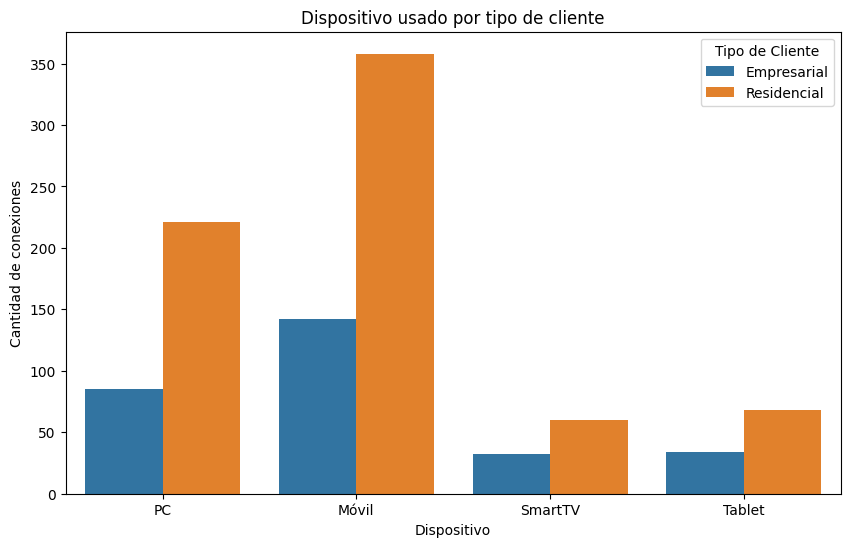

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dispositivo', hue='tipo_cliente')
plt.title('Dispositivo usado por tipo de cliente')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad de conexiones')
plt.legend(title='Tipo de Cliente')
plt.show()


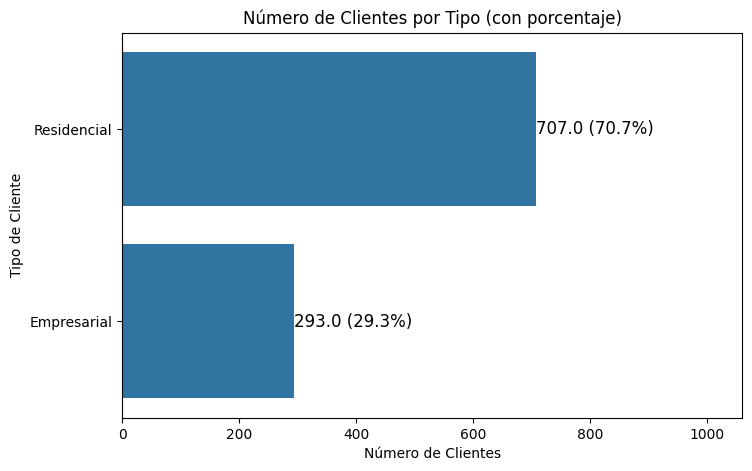

In [8]:
# Conteo y porcentaje por tipo de cliente
conteo_tipo = df['tipo_cliente'].value_counts().reset_index()
conteo_tipo.columns = ['tipo_cliente', 'conteo']
conteo_tipo['porcentaje'] = (conteo_tipo['conteo'] / conteo_tipo['conteo'].sum()) * 100

# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=conteo_tipo, y='tipo_cliente', x='conteo')

# Agregar etiquetas de conteo y porcentaje
for i in ax.containers:
    ax.bar_label(i, labels=[
        f"{v.get_width()} ({v.get_width()/conteo_tipo['conteo'].sum()*100:.1f}%)"
        for v in i], label_type='edge', fontsize=12)

plt.title('Número de Clientes por Tipo (con porcentaje)')
plt.xlabel('Número de Clientes')
plt.ylabel('Tipo de Cliente')
plt.xlim(0, conteo_tipo['conteo'].max() * 1.5)
plt.show()


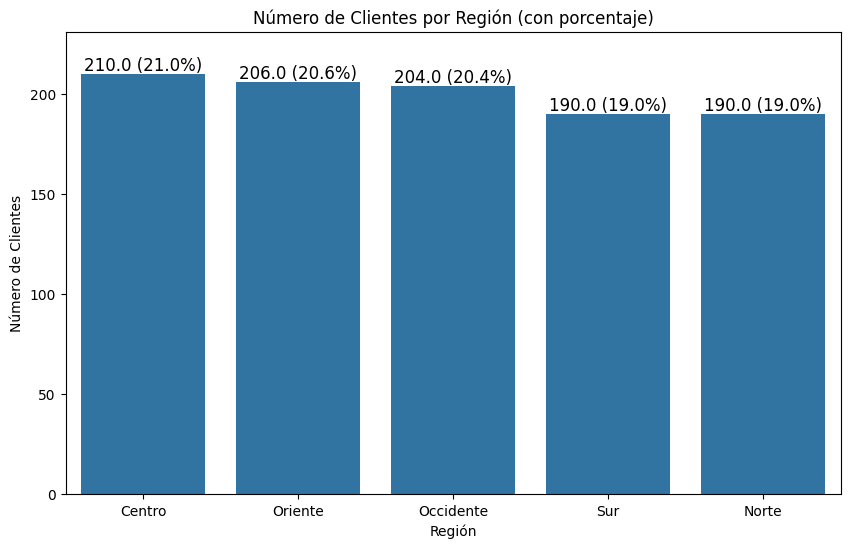

In [9]:
# Conteo de clientes por región
conteo_region = df['region'].value_counts().reset_index()
conteo_region.columns = ['region', 'conteo']

# Calcular el porcentaje
conteo_region['porcentaje'] = (conteo_region['conteo'] / conteo_region['conteo'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=conteo_region, x='region', y='conteo')

# Agregar etiquetas de conteo y porcentaje
for i in ax.containers:
    ax.bar_label(i, labels=[
        f"{v.get_height()} ({v.get_height()/conteo_region['conteo'].sum()*100:.1f}%)"
        for v in i], label_type='edge', fontsize=12)

plt.title('Número de Clientes por Región (con porcentaje)')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')
plt.ylim(0, conteo_region['conteo'].max() * 1.1)
plt.show()

**Recomendaciones de Visualización:**
+ Usa countplot() de Seaborn para categorías.
+ Para muchas categorías, gráficos de barras horizontales son más legibles.
+ Para combinaciones, usa hue en Seaborn o stacked bars.

## 3. Distribución Geométrica Aplicada (Intentos de Conexión)

**Probabilidad empírica:** ¿Cuántos clientes necesitaron más de 3 intentos?

In [10]:
clientes_mas_3 = df[df['intentos_conexion'] > 3]
porcentaje = (len(clientes_mas_3) / len(df)) * 100

print(f"El {porcentaje:.2f}% de los clientes necesitó más de 3 intentos.")


El 35.40% de los clientes necesitó más de 3 intentos.


**Modelo de Distribución Geométrica Teórica**
Vamos a suponer que el éxito de conexión tiene probabilidad `p`.

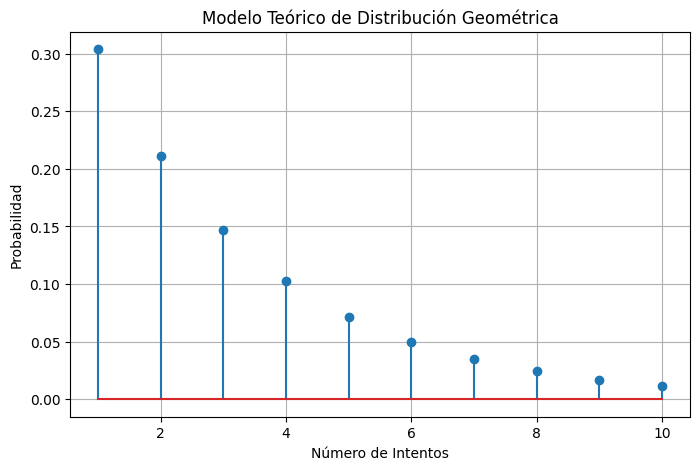

In [11]:
# Calcular la probabilidad teórica de éxito en el primer intento
p_exito = 1 / df['intentos_conexion'].mean()

# Distribución geométrica teórica hasta 10 intentos
k = np.arange(1, 11)
pmf = geom.pmf(k, p_exito)

plt.figure(figsize=(8, 5))
plt.stem(k, pmf)  
plt.title('Modelo Teórico de Distribución Geométrica')
plt.xlabel('Número de Intentos')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()

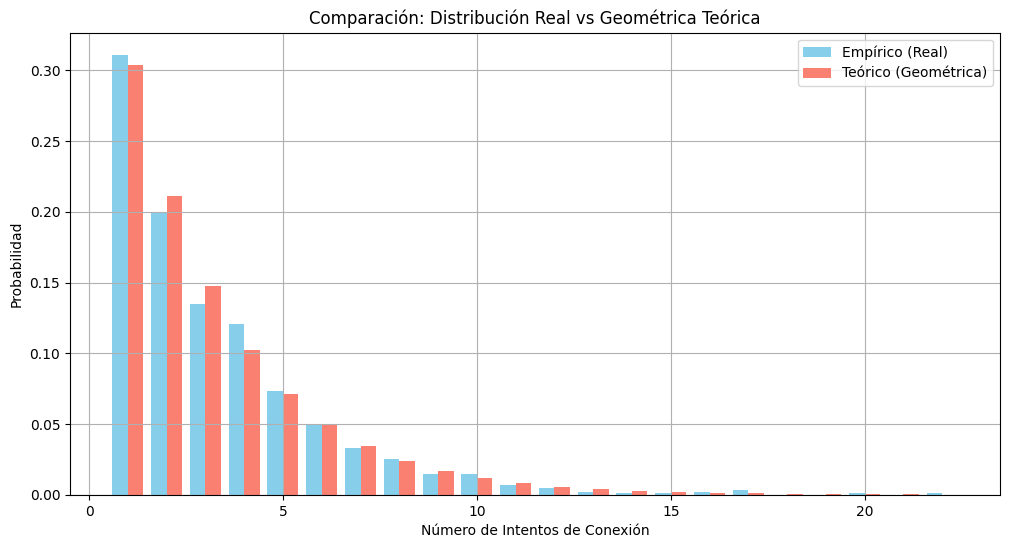

In [12]:
# 1. Frecuencia empírica
frecuencia_real = df['intentos_conexion'].value_counts().sort_index()

# 2. Frecuencia relativa (probabilidades reales)
frecuencia_relativa_real = frecuencia_real / frecuencia_real.sum()

# 3. Valores k a analizar (los que usaste en la distribución teórica)
k_values = np.arange(1, frecuencia_real.index.max() + 1)

# 4. Reindexamos para asegurarnos que no falten valores
frecuencia_relativa_real_completa = frecuencia_relativa_real.reindex(k_values, fill_value=0)

# 5. Distribución geométrica teórica
p_exito_estimado = 1 / df['intentos_conexion'].mean()  # Probabilidad teórica de éxito
prob_teorica_geom = geom.pmf(k_values, p_exito_estimado)

# 6. Gráfica comparativa
plt.figure(figsize=(12, 6))
plt.bar(k_values - 0.2, frecuencia_relativa_real_completa, width=0.4, label='Empírico (Real)', color='skyblue')
plt.bar(k_values + 0.2, prob_teorica_geom, width=0.4, label='Teórico (Geométrica)', color='salmon')

plt.xlabel('Número de Intentos de Conexión')
plt.ylabel('Probabilidad')
plt.title('Comparación: Distribución Real vs Geométrica Teórica')
plt.legend()
plt.grid(True)
plt.show()


## 4. Análisis Exploratorio con Pandas Profiling

In [13]:
# Generar el reporte
profile = ProfileReport(df, title="Reporte de Conexiones de Clientes", explorative=True)

# Guardar el reporte como archivo HTML
profile.to_file("reporte_conexiones_clientes.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile

## 5. Revisión de la variable continua tiempo_conexion_ms

**a) Resumen estadístico**

In [15]:
df['tiempo_conexion_ms'].describe()

count    1000.000000
mean      149.460959
std        30.684593
min        62.116539
25%       127.877386
50%       150.005537
75%       169.951487
max       247.292789
Name: tiempo_conexion_ms, dtype: float64

**b) Verificar valores extremos o outliers**

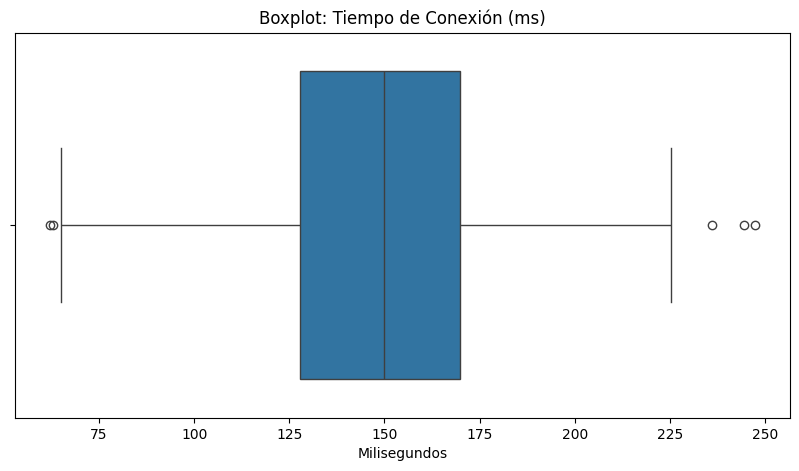

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['tiempo_conexion_ms'])
plt.title('Boxplot: Tiempo de Conexión (ms)')
plt.xlabel('Milisegundos')
plt.show()


+ Método de Rango Intercuartílico (IQR)

In [17]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df['tiempo_conexion_ms'].quantile(0.25)
Q3 = df['tiempo_conexion_ms'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_iqr = df[(df['tiempo_conexion_ms'] < limite_inferior) | (df['tiempo_conexion_ms'] > limite_superior)]

print(f"Se encontraron {outliers_iqr.shape[0]} outliers con el método IQR.")
outliers_iqr[['cliente_id', 'tiempo_conexion_ms']].head()


Se encontraron 5 outliers con el método IQR.


,cliente_id,tiempo_conexion_ms
158,159,62.790353
247,248,236.052092
460,461,62.116539
722,723,247.292789
988,989,244.561702


+ Método de Desviaciones Estándar (Regla Empírica) Asumiendo que la distribución es aproximadamente normal:

In [18]:
# Calcular media y desviación estándar
mu = df['tiempo_conexion_ms'].mean()
sigma = df['tiempo_conexion_ms'].std()

# Definir límites (3 desviaciones estándar)
lim_inferior_std = mu - 3 * sigma
lim_superior_std = mu + 3 * sigma

# Filtrar los outliers
outliers_std = df[(df['tiempo_conexion_ms'] < lim_inferior_std) | (df['tiempo_conexion_ms'] > lim_superior_std)]

print(f"Se encontraron {outliers_std.shape[0]} outliers con el método de 3 desviaciones estándar.")
outliers_std[['cliente_id', 'tiempo_conexion_ms']].head()


Se encontraron 2 outliers con el método de 3 desviaciones estándar.


,cliente_id,tiempo_conexion_ms
722,723,247.292789
988,989,244.561702


**Gráfico de Dispersión de Outliers Detectados**

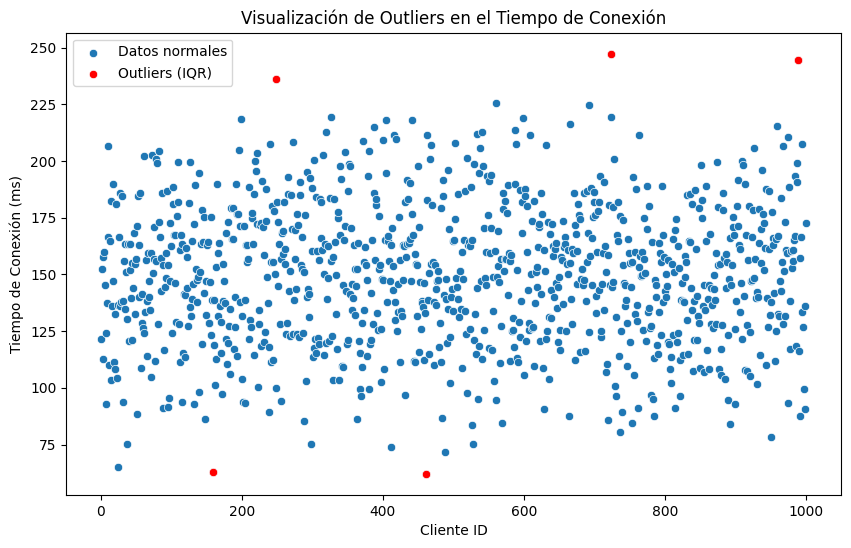

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cliente_id', y='tiempo_conexion_ms', data=df, label='Datos normales')

# Agregar los outliers
sns.scatterplot(x='cliente_id', y='tiempo_conexion_ms', data=outliers_iqr, color='red', label='Outliers (IQR)')

plt.title('Visualización de Outliers en el Tiempo de Conexión')
plt.xlabel('Cliente ID')
plt.ylabel('Tiempo de Conexión (ms)')
plt.legend()
plt.show()


**Interpretación**
+ Los outliers pueden indicar clientes con problemas de red, dispositivos lentos o zonas con alta latencia.
+ En un otros procesos, se analizarían estos casos para tomar decisiones:
    * ¿Se ignoran en el modelo?
    * ¿Se transforman los datos?
    * ¿Se revisan las anomalías?

**C) Análisis de Distribución Normal de la Variable Continua**

+ Histograma con Curva KDE

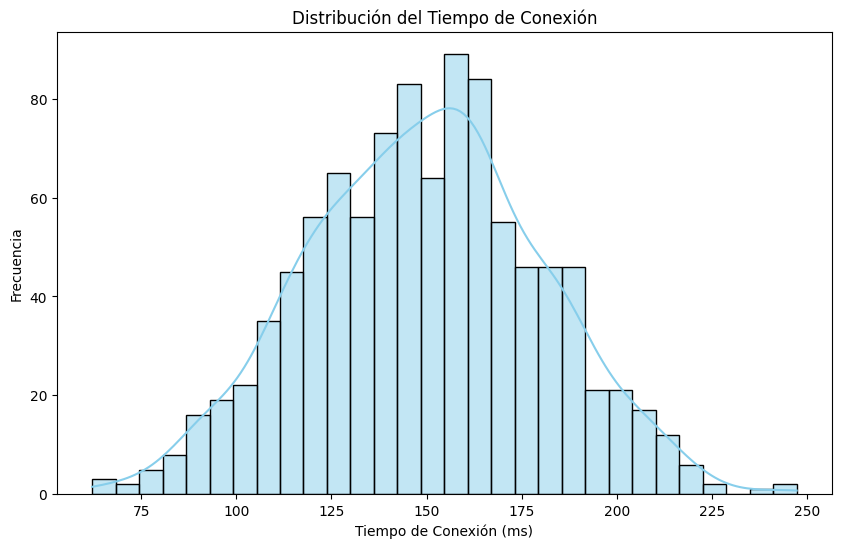

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tiempo_conexion_ms'], kde=True, bins=30, color='skyblue')
plt.title('Distribución del Tiempo de Conexión')
plt.xlabel('Tiempo de Conexión (ms)')
plt.ylabel('Frecuencia')
plt.show()

+ Superponer la curva teórica de la distribución normal

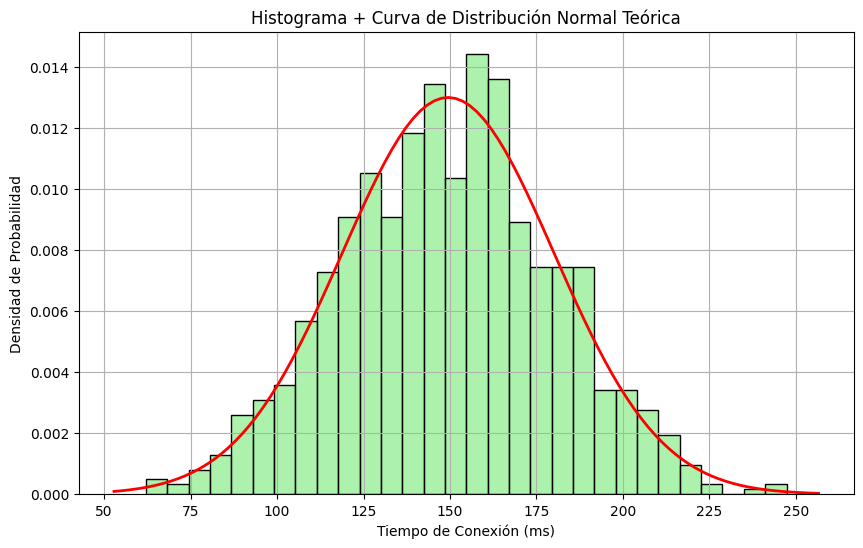

In [21]:
# Parámetros de la distribución normal
mu = df['tiempo_conexion_ms'].mean()
sigma = df['tiempo_conexion_ms'].std()

# Graficar el histograma primero
plt.figure(figsize=(10, 6))
sns.histplot(df['tiempo_conexion_ms'], kde=False, bins=30, stat="density", color='lightgreen')

# Definir xmin y xmax después del histograma
xmin, xmax = plt.xlim()

# Ahora sí generas el rango de x y la curva de la PDF normal
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Graficar la curva de distribución normal teórica
plt.plot(x, p, 'r', linewidth=2)

# Etiquetas y detalles
plt.title('Histograma + Curva de Distribución Normal Teórica')
plt.xlabel('Tiempo de Conexión (ms)')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.show()


+ Aplicación de la Regla Empírica (68-95-99.7)

In [22]:
mean = mu
std = sigma

# Intervalos de confianza de 1, 2 y 3 desviaciones estándar
dentro_1sigma = df[(df['tiempo_conexion_ms'] >= mean - std) & (df['tiempo_conexion_ms'] <= mean + std)].shape[0] / len(df) * 100
dentro_2sigma = df[(df['tiempo_conexion_ms'] >= mean - 2*std) & (df['tiempo_conexion_ms'] <= mean + 2*std)].shape[0] / len(df) * 100
dentro_3sigma = df[(df['tiempo_conexion_ms'] >= mean - 3*std) & (df['tiempo_conexion_ms'] <= mean + 3*std)].shape[0] / len(df) * 100

print(f"Porcentaje dentro de 1σ: {dentro_1sigma:.2f}%")
print(f"Porcentaje dentro de 2σ: {dentro_2sigma:.2f}%")
print(f"Porcentaje dentro de 3σ: {dentro_3sigma:.2f}%")


Porcentaje dentro de 1σ: 66.60%
Porcentaje dentro de 2σ: 95.60%
Porcentaje dentro de 3σ: 99.80%


+ Relación entre Variables (Intenciones de Conexión vs Tiempo de Conexión)

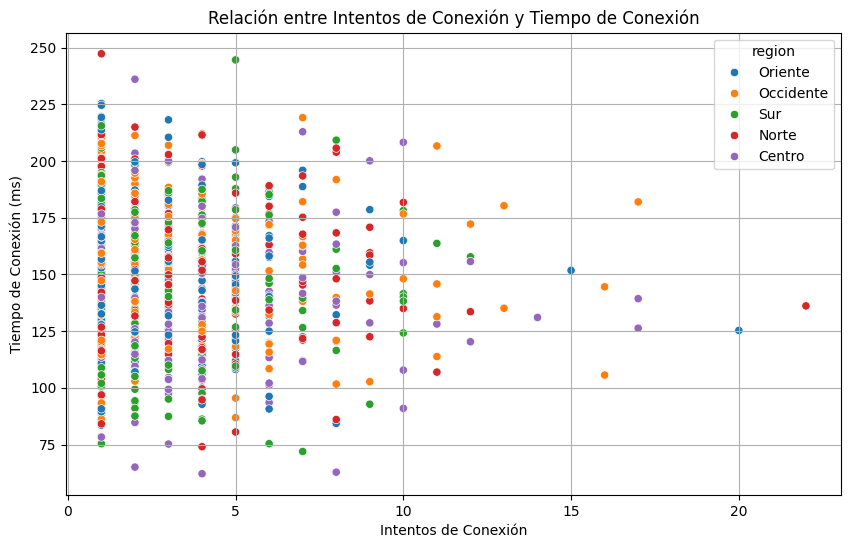

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='intentos_conexion', y='tiempo_conexion_ms', hue='region')
plt.title('Relación entre Intentos de Conexión y Tiempo de Conexión')
plt.xlabel('Intentos de Conexión')
plt.ylabel('Tiempo de Conexión (ms)')
plt.grid(True)
plt.show()


## 6. Revisión de relaciones 

+ **Diagrama de Dispersión + Regresión**

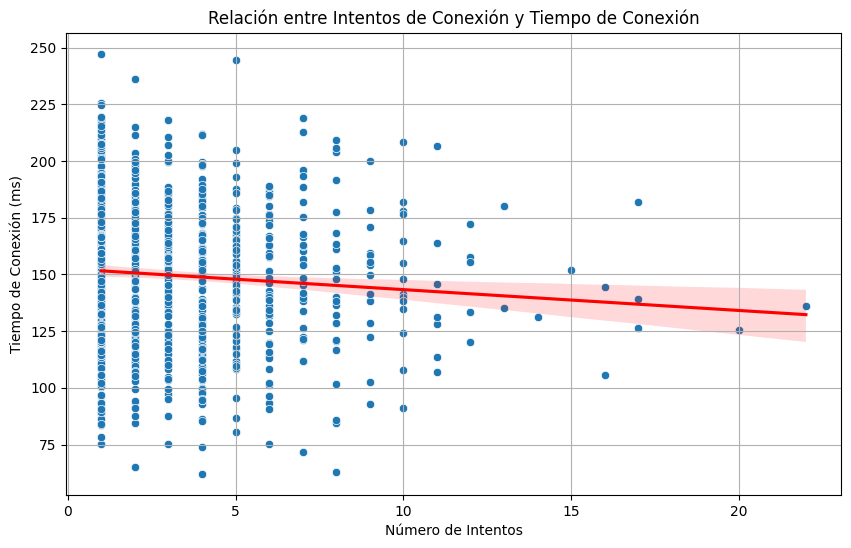

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='intentos_conexion', y='tiempo_conexion_ms')#, hue='tipo_cliente')
sns.regplot(data=df, x='intentos_conexion', y='tiempo_conexion_ms', scatter=False, color='red')
plt.title('Relación entre Intentos de Conexión y Tiempo de Conexión')
plt.xlabel('Número de Intentos')
plt.ylabel('Tiempo de Conexión (ms)')
plt.grid(True)
plt.show()

+ **Análisis: ¿A más intentos, mayor tiempo?**

In [25]:
correlacion = df['intentos_conexion'].corr(df['tiempo_conexion_ms'])
print(f"Correlación entre Intentos de Conexión y Tiempo de Conexión: {correlacion:.2f}")


Correlación entre Intentos de Conexión y Tiempo de Conexión: -0.08


**Preguntas Clave para el Taller**
1. ¿Cuál es la región con mayor tiempo promedio de conexión?
2. ¿Los clientes con más de 5 intentos de conexión tienen tiempos significativamente mayores? (Usar groupby y describe).
3. ¿Qué tipo de cliente tiene el tiempo de conexión más estable (menor desviación estándar)?
4. Comparar el comportamiento de los tiempos de conexión respecto a la Distribución Normal usando gráficos e interpretación de la Regla Empírica.
5. ¿Qué se recomienda para mejorar la experiencia del cliente en cuanto a tiempos y cantidad de intentos?